# Tugas 3

# K-MEANS CLUSTER 2,3 DAN 4

In [1]:
%pip install pymysql
%pip install psycopg2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Bagian Awal: Ambil dan Gabungkan Data

In [4]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd

def get_pg_data():
    conn = psycopg2.connect(
        host="postgreependat2-pendat4.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_4T2SWDdsuTxisd9TzFu",
        database="defaultdb",
        port=24915
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM iris_postgresql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysqlpendat23-pendat4.h.aivencloud.com",
        user="avnadmin",
        password="AVNS_QaQiHV_Bc5n2tLGZIlj",
        database="defaultdb",
        port=24915
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM irismysql")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Cetak semua data hasil gabungan tanpa indeks
print(df_merged.to_string(index=False))

 id           class  petal_length  petal_width  sepal_length  sepal_width
  1     Iris-setosa           1.4          0.2           5.1          3.5
  2     Iris-setosa          14.0          2.0          49.0         30.0
  3     Iris-setosa           1.3          0.2           4.7          3.2
  4     Iris-setosa          15.0         20.0          46.0         31.0
  5     Iris-setosa           1.4          0.2           5.0          3.6
  6     Iris-setosa           1.7          0.4           5.4          3.9
  7     Iris-setosa           1.4          0.3           4.6          3.4
  8     Iris-setosa           1.5          0.2           5.0          3.4
  9     Iris-setosa           1.4          0.2           4.4          2.9
 10     Iris-setosa           1.5          0.1           4.9          3.1
 11     Iris-setosa           1.5          0.2           5.4          3.7
 12     Iris-setosa          16.0         20.0          48.0         34.0
 13     Iris-setosa           1.4     

Kode Python di atas digunakan untuk mengambil dan menggabungkan data dari dua database berbeda: PostgreSQL dan MySQL, lalu menampilkannya dalam bentuk tabel gabungan. Pertama, program mengimpor pustaka yang diperlukan: psycopg2 untuk koneksi ke PostgreSQL, pymysql untuk koneksi ke MySQL, serta numpy dan pandas untuk manipulasi data. Fungsi get_pg_data() melakukan koneksi ke server PostgreSQL menggunakan informasi host, username, password, database, dan port, lalu menjalankan query untuk mengambil seluruh data dari tabel iris_postgresql. Hasil query diambil dan dikonversi menjadi objek DataFrame pandas, lengkap dengan nama kolom. Fungsi get_mysql_data() melakukan hal yang serupa, tetapi terhadap database MySQL dan tabel irismysql.

Setelah data dari kedua database berhasil diambil, masing-masing dalam bentuk DataFrame, program menggunakan fungsi pd.merge() dari pandas untuk menggabungkan kedua DataFrame tersebut berdasarkan kolom id dan class, dengan metode penggabungan inner, yang berarti hanya data yang memiliki pasangan cocok pada kedua sisi yang akan disertakan dalam hasil akhir. Hasil dari penggabungan ini disimpan dalam variabel df_merged. Terakhir, data yang sudah digabungkan dicetak ke layar dalam bentuk tabel lengkap tanpa menampilkan indeks baris, menggunakan fungsi to_string(index=False) dari pandas.

## Preprocessing dan Reduksi Dimensi

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop kolom non-numerik
features = df_merged.drop(columns=['id', 'class'])

# Normalisasi
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Reduksi dimensi untuk visualisasi
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)


Kode di atas digunakan untuk melakukan normalisasi data dan reduksi dimensi pada data hasil gabungan sebelumnya (df_merged), dengan tujuan agar data tersebut bisa divisualisasikan secara lebih sederhana dan mudah dipahami. Langkah pertama dilakukan dengan menghapus kolom non-numerik, yaitu id dan class, karena kedua kolom tersebut tidak relevan untuk analisis numerik atau statistik. Kolom-kolom yang tersisa kemudian dimasukkan ke dalam variabel features.

Selanjutnya, data pada features dinormalisasi menggunakan StandardScaler dari pustaka sklearn.preprocessing. Proses normalisasi ini penting untuk memastikan bahwa setiap fitur memiliki rata-rata 0 dan standar deviasi 1, sehingga semua fitur memiliki skala yang sama dan tidak ada fitur yang mendominasi yang lain dalam proses analisis. Setelah normalisasi, fitur yang telah diskalakan disimpan dalam scaled_features.

Kemudian, dilakukan reduksi dimensi menggunakan Principal Component Analysis (PCA) dari sklearn.decomposition. PCA adalah teknik statistik yang digunakan untuk menyederhanakan dataset berdimensi tinggi dengan mengubahnya menjadi dimensi yang lebih rendah sambil tetap mempertahankan sebanyak mungkin variasi atau informasi penting dari data aslinya. Dalam hal ini, data direduksi menjadi hanya dua komponen utama (n_components=2) agar dapat divisualisasikan secara dua dimensi. Hasil akhir dari reduksi ini disimpan dalam reduced_features.

## Clustering + Visualisasi (2 Cluster)

[2 Clusters] Inertia: 111.05, Silhouette Score: 0.9037


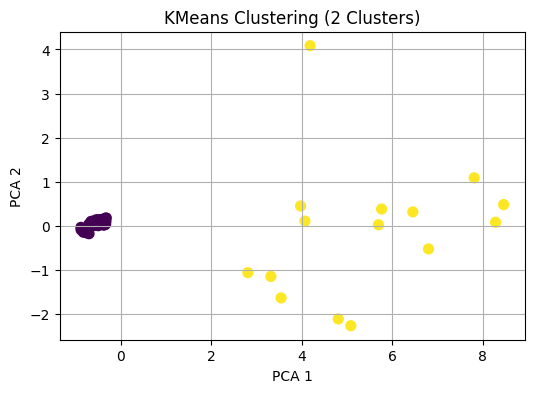

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# KMeans dengan 2 cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_2 = kmeans_2.fit_predict(scaled_features)

# Metode evaluasi
inertia_2 = kmeans_2.inertia_
silhouette_2 = silhouette_score(scaled_features, labels_2)

print(f"[2 Clusters] Inertia: {inertia_2:.2f}, Silhouette Score: {silhouette_2:.4f}")

# Visualisasi
plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_2, cmap='viridis', s=50)
plt.title("KMeans Clustering (2 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Kode di atas digunakan untuk menerapkan algoritma K-Means clustering dengan jumlah cluster sebanyak dua, dan mengevaluasi hasilnya menggunakan dua metrik utama: inertia dan silhouette score. Pertama, objek KMeans dibuat dengan parameter n_clusters=2, yang berarti algoritma akan mencoba membagi data ke dalam dua kelompok. Parameter random_state=42 digunakan untuk memastikan hasil yang konsisten setiap kali kode dijalankan, sedangkan n_init=10 menentukan bahwa algoritma akan dijalankan sebanyak 10 kali dengan pusat cluster awal yang berbeda, dan hasil terbaik akan diambil.

Setelah model KMeans dilatih dengan data yang sudah dinormalisasi (scaled_features), label hasil cluster disimpan di variabel labels_2. Kemudian, dua metrik evaluasi dihitung: inertia, yaitu total jarak kuadrat dari setiap titik ke pusat klusternya (semakin kecil semakin baik), dan silhouette_score, yaitu skor yang mengukur seberapa baik pemisahan antar cluster (semakin mendekati 1, semakin baik). Dalam output yang ditampilkan, nilai inertia adalah 111.05, dan silhouette score sebesar 0.9037, yang menunjukkan kualitas pemisahan cluster yang sangat baik.

Hasil dari clustering ini divisualisasikan menggunakan scatter plot berdasarkan dua komponen utama hasil PCA (reduced_features), dengan setiap titik diwarnai berdasarkan label cluster-nya (c=labels_2). Pada visualisasi yang ditampilkan, tampak dua cluster yang sangat jelas terpisah: satu cluster berwarna ungu gelap terkonsentrasi di sekitar titik pusat (kiri bawah grafik), dan satu cluster berwarna kuning tersebar lebih luas di sisi kanan grafik. Pola ini memperkuat temuan dari silhouette score yang tinggi, menandakan bahwa model KMeans berhasil membentuk dua kelompok data yang secara struktural berbeda satu sama lain.

## Clustering + Visualisasi (3 Cluster)

[3 Clusters] Inertia: 65.11, Silhouette Score: 0.8879


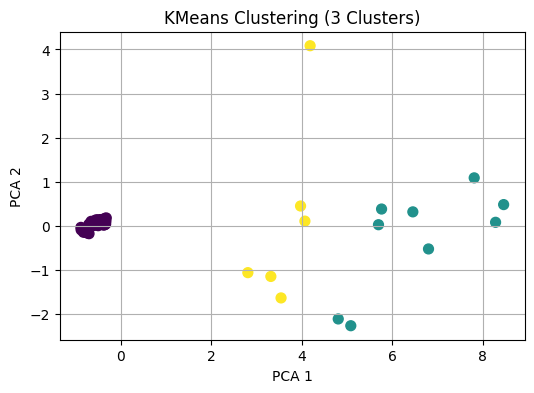

In [7]:
# KMeans dengan 3 cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_3 = kmeans_3.fit_predict(scaled_features)

inertia_3 = kmeans_3.inertia_
silhouette_3 = silhouette_score(scaled_features, labels_3)

print(f"[3 Clusters] Inertia: {inertia_3:.2f}, Silhouette Score: {silhouette_3:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', s=50)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Kode di atas digunakan untuk menerapkan algoritma K-Means clustering dengan jumlah cluster sebanyak 3, dan mengevaluasi hasilnya menggunakan dua metrik penting: inertia dan silhouette score. Pertama, objek KMeans diinisialisasi dengan n_clusters=3, lalu data yang telah dinormalisasi (scaled_features) diproses untuk mendapatkan label hasil cluster (labels_3). Nilai inertia menunjukkan total jarak kuadrat dari tiap titik ke pusat cluster-nya, dan semakin kecil nilainya berarti cluster semakin kompak. Dalam kasus ini, inertia-nya adalah 65.11, jauh lebih kecil dibandingkan hasil sebelumnya dengan 2 cluster (111.05), yang menandakan bahwa distribusi dalam cluster lebih rapat.

Namun, meskipun inertia lebih kecil, silhouette score yang dihasilkan adalah 0.8879, sedikit lebih rendah daripada saat menggunakan 2 cluster (0.9037). Ini menunjukkan bahwa meskipun distribusi titik dalam cluster lebih padat, pemisahan antar cluster tidak sejelas sebelumnya. Dengan kata lain, menambah jumlah cluster tidak selalu menghasilkan kualitas pemisahan yang lebih baik.

Visualisasi hasil clustering ditampilkan dalam bentuk scatter plot dua dimensi berdasarkan hasil reduksi PCA. Masing-masing titik diwarnai berdasarkan cluster-nya, dan terlihat bahwa titik-titik kini dikelompokkan menjadi tiga warna berbeda. Secara visual, tiga cluster memang dapat dibedakan, namun dua di antaranya (kuning dan hijau tosca) memiliki area yang cukup berdekatan, sementara cluster ungu masih terkonsentrasi di sisi kiri bawah. Hal ini mencerminkan kenapa silhouette score-nya sedikit lebih rendah—karena terdapat kemungkinan tumpang tindih antar cluster.

## Clustering + Visualisasi (4 Cluster)

[4 Clusters] Inertia: 47.18, Silhouette Score: 0.8944


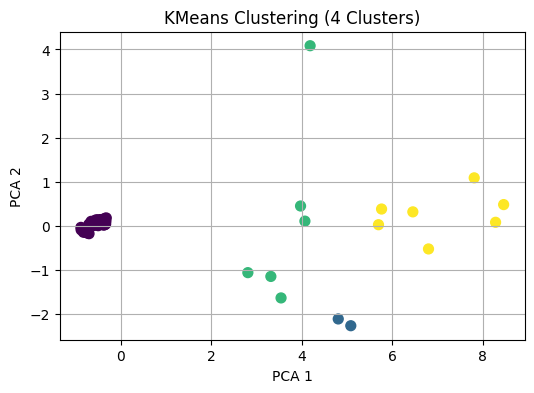

In [8]:
# KMeans dengan 4 cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_4 = kmeans_4.fit_predict(scaled_features)

inertia_4 = kmeans_4.inertia_
silhouette_4 = silhouette_score(scaled_features, labels_4)

print(f"[4 Clusters] Inertia: {inertia_4:.2f}, Silhouette Score: {silhouette_4:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_4, cmap='viridis', s=50)
plt.title("KMeans Clustering (4 Clusters)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


Kode di atas melanjutkan eksplorasi metode K-Means clustering dengan menerapkan jumlah cluster sebanyak 4, dengan tujuan untuk mengetahui apakah pemisahan data menjadi 4 kelompok menghasilkan segmentasi yang lebih baik. Seperti sebelumnya, objek KMeans diinisialisasi dengan n_clusters=4, dan data scaled_features digunakan untuk memprediksi label cluster. Hasil clustering dievaluasi menggunakan dua metrik utama: inertia dan silhouette score.

Nilai inertia untuk 4 cluster adalah 47.18, yang semakin kecil dibandingkan 2 dan 3 cluster sebelumnya. Ini menunjukkan bahwa titik-titik data semakin dekat ke pusat clusternya masing-masing, alias semakin rapat. Namun demikian, nilai silhouette score adalah 0.8944, yang sedikit lebih rendah dibandingkan saat menggunakan 2 cluster (0.9037), tapi sedikit lebih tinggi dari saat menggunakan 3 cluster (0.8879). Ini menandakan bahwa pemisahan antar cluster tetap baik, meskipun ada indikasi bahwa beberapa cluster mulai tumpang tindih atau kurang terdefinisi secara tajam.

Dari visualisasi yang dihasilkan, data direpresentasikan dalam dua dimensi hasil reduksi PCA. Terlihat ada 4 kelompok dengan warna berbeda, dan sebagian cluster tampak cukup dekat satu sama lain, khususnya dua cluster yang berada di sisi kanan bawah grafik. Sementara itu, satu cluster di sisi kiri tetap terkonsentrasi rapi, seperti pada hasil clustering sebelumnya.

Secara keseluruhan, penambahan jumlah cluster menjadi 4 menghasilkan segmentasi yang lebih granular dan inertia yang lebih rendah, tetapi sedikit mengorbankan kualitas pemisahan antar cluster, sebagaimana ditunjukkan oleh nilai silhouette score yang mulai menurun jika dibandingkan dengan saat hanya menggunakan 2 cluster.